# Prática independente - Gradiente Descendente.

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

#Tamanho padrão das figuras neste notebook
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100

#### O Gradiente Descendente é um algoritmo de otimização de minimização de uma função custo, ou função erro. o algoritmo procura por direções de gradiente negativo.

- Encontre um valor inicial para $X_{0}$
- Escreva um laço para $i$, com um número ($i = 0, 1, 2, ... $) de variáveis.
- Calcule $s_k$ = -$\nabla f(x_k)$
- Escolha a taxa de aprendizado $\alpha_{k}$ que minimiza $f(x_k+\alpha_{k} s_{k})$
- Faça $x_{k + 1} = x_{k} + \alpha_k s_{k}$

#### Exercicio 1 - Gradiente Descendente: Encontre o valor mínimo para a função de custo $f(x) = x^{3} - 2x^{2} + 2$.

#### Defina a função custo e plot seu valor no invervalo `x = [-1.0, 2,5]` e `y = [0.0, 3.0]`.

In [3]:
funcao_custo = lambda x: x ** 3 - 2 * x ** 2 + 2

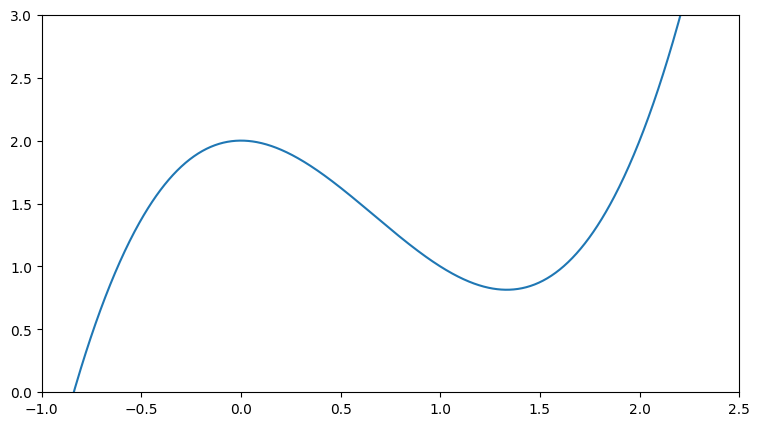

In [6]:
x = np.linspace(-1,2.5,1000) # distribuição com 1000 valores entre o valor mínimo e máximo de x

xmin = -1.0 # x mínimo
xmax = 2.5 # x máximo
ymin = 0.0 # y mínimo
ymax = 3.0 # y máximo

plt.plot(x,funcao_custo(x))
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax]);

#### Escreva uma função para calcular ponto mínimo $X_{min}$, começando a busca por $X_{0} = 2$. Imprima também o número de passos aplicados ao Gradiente Descendente. Defina um passo de tamanho $0.1$ a precisão como $0.0001$.

In [7]:
x_antigo = 0
x_novo = 2 # a busca começa em X0 = 2
alpha = 0.1 # tamanho do passo (alpha)
precisao = 0.0001
passo = 1

def derivativa_de_funcao(x):
    return 3 * x ** 2 - 4 * x # Retorna o valor da derivativa da função
 

x_lista, y_lista = [x_novo], [derivativa_de_funcao(x_novo)]

while abs(x_novo - x_antigo) > precisao:
    x_antigo = x_novo
    s_k = -derivativa_de_funcao(x_antigo)
    x_novo = x_antigo + alpha * s_k
    print(f'Passo: {passo} - Local mínimo: {x_novo}')
    x_lista.append(x_novo)
    y_lista.append(derivativa_de_funcao(x_novo))
    passo += 1

print()
print("O ponto mínimo ocorre em:", x_novo)
print("Número de passos:", len(x_lista))

Passo: 1 - Local mínimo: 1.6
Passo: 2 - Local mínimo: 1.472
Passo: 3 - Local mínimo: 1.4107648
Passo: 4 - Local mínimo: 1.377993523724288
Passo: 5 - Local mínimo: 1.3595310877861793
Passo: 6 - Local mínimo: 1.3488460893035294
Passo: 7 - Local mínimo: 1.3425687932361137
Passo: 8 - Local mínimo: 1.3388490211591169
Passo: 9 - Local mínimo: 1.336633619185146
Passo: 10 - Local mínimo: 1.3353102372784098
Passo: 11 - Local mínimo: 1.3345183032556167
Passo: 12 - Local mínimo: 1.3340438940405883
Passo: 13 - Local mínimo: 1.3337595182887307
Passo: 14 - Local mínimo: 1.333588989816487
Passo: 15 - Local mínimo: 1.3334867076151544
Passo: 16 - Local mínimo: 1.3334253508453249

O ponto mínimo ocorre em: 1.3334253508453249
Número de passos: 17


#### Acima você fez uso de uma taxa de aprendizado, ou o passo do algoritmo, constante, o que para um valor baixo pode significar lenta convergência. Estude o método [`scipy.optimize.fmin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) e tente otimizar o número de passos que o algoritmo dá para apresentar um resultado. Em outras palavras, otimize a taxa de aprendizagem do modelo.

In [9]:
def derivativa_de_funcao(x):
    return 3 * x ** 2 - 4 * x # Retorna o valor da derivativa da função

# função para ser utilizado no otimizador
def funcao_objetiva(n,x,s):
    x = x + n * s
    return derivativa_de_funcao(x)

x_antigo = 0
x_novo = 2 # a busca começa em X0 = 2
alpha = 0.1 # tamanho do passo (alpha)
precisao = 0.0001

x_lista, y_lista = [x_novo], [derivativa_de_funcao(x_novo)]

while abs(x_novo - x_antigo) > precisao:
  x_antigo = x_novo
  s_k = -derivativa_de_funcao(x_antigo)

  #otimizador do scipy para encontrar o melhor número de passos 
  n_k = fmin(funcao_objetiva, 0.1, (x_antigo, s_k), 
              full_output = False, 
              disp = False
            )
    
  x_novo = x_antigo + n_k * s_k
  x_lista.append(x_novo)
  y_lista.append(derivativa_de_funcao(x_novo))

print("O ponto mínimo ocorre em:", float(x_novo))
print("Número de passos:", len(x_lista))

O ponto mínimo ocorre em: 0.6666666666641204
Número de passos: 4


#### Teste também outro método de ajuste da taxa de aprendizado, criando uma "constante" que varia de acordo com uma constande de redução $d$, como visto a seguir. 
$$
\begin{equation}
\alpha_{t+1} = \frac{\alpha_{t}}{(1+t\times d)}
\end{equation}
$$

In [10]:
def derivativa_de_funcao(x):
    return 3 * x ** 2 - 4 * x # Retorna o valor da derivativa da função

# função para ser utilizado no otimizador
def funcao_objetiva(n,x,s):
    x = x + n * s
    return derivativa_de_funcao(x)

x_antigo = 0
x_novo = 2 # a busca começa em X0 = 2
n_k = 0.17 # tamanho do passo
precisao = 0.0001
t, d = 0, 1

x_lista, y_lista = [x_novo], [derivativa_de_funcao(x_novo)]

while abs(x_novo - x_antigo) > precisao:
  x_antigo = x_novo
  s_k = -derivativa_de_funcao(x_antigo)
  x_novo = x_antigo + n_k * s_k
  x_lista.append(x_novo)
  y_lista.append(derivativa_de_funcao(x_novo))
  n_k = n_k / (1 + t * d)
  t += 1

print("O ponto mínimo ocorre em:", x_novo)
print("Número de passos:", len(x_lista))

O ponto mínimo ocorre em: 1.3308506740900838
Número de passos: 6


#### Exercício 2 - Regressão Linear: Como a temperatura afeta os ruídos dos grilos. No arquivo `SGD_data.txt`, você encontra  uma base de dados de taxas de [chilreio](https://escola.britannica.com.br/artigo/grilo/481074) de grilos em várias temperaturas. Carregue o conjunto, e plote a dispersão entre `Temperatura` em graus Fahrenheit e os `chilreios/s` para o [Allonemobius fasciatus](https://www.cirrusimage.com/orthoptera_striped_cricket/):

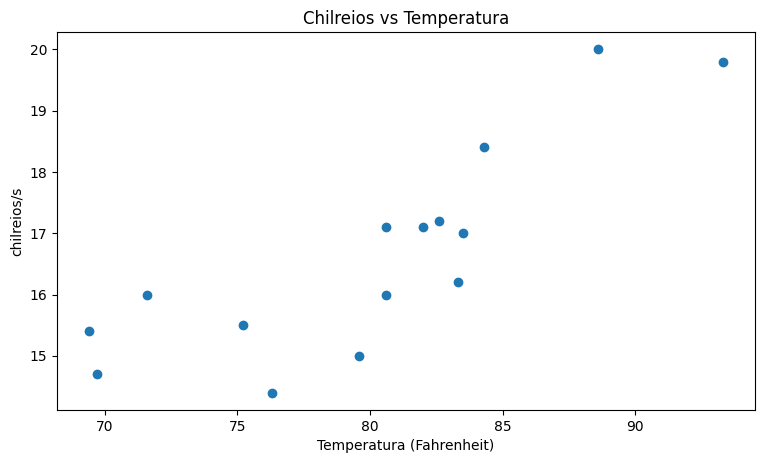

In [12]:
# Carregando dados como um array numpy (duas dimensões: taxas de chilheio e temperaturas)
grilos = np.loadtxt('SGD_data.txt', delimiter = ',')

#Plotando dados
plt.scatter(x= grilos[:, 1],
            y= grilos[:, 0], 
             )

plt.title('Chilreios vs Temperatura')
plt.ylabel('chilreios/s')
plt.xlabel('Temperatura (Fahrenheit)');

Percebemos uma correlação linear positiva entre taxas de chilreios e temperatura, o que nos faz levantar a hipótese de quanto maior a temperatura (variável preditora/independente), maior o número de grilos e, consequentemente, a taxa de chilreios (variável resposta/dependente).

#### Seu objetivo é encontrar a equação de reta $h_\theta(x) = \theta_0 + \theta_1 x$ que melhor se ajusta aos pontos. 

$$
\begin{equation}
J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2
\end{equation}
$$

Aqui o Gradiente terá duas dimensões:


$$
\begin{equation}
\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)
\end{equation}
$$

$$
\begin{equation}
\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)
\end{equation}
$$

#### Configure as funções $h$, $J$ e o gradiente:

In [28]:
h = lambda theta_0, theta_1, x: theta_0 + theta_1 * x

def J(x, y, m, theta_0, theta_1):
    returnValue = 0
    for i in range(m):
        returnValue += (h(theta_0,
                          theta_1, 
                          x[i]) - y[i]) ** 2
    returnValue = returnValue / (2 * m)
    return returnValue

def grad_J(x, y, m, theta_0, theta_1):
    returnValue = np.array([0., 0.])
    for i in range(m):
        returnValue[0] += (h(theta_0, theta_1, x[i]) - y[i])
        returnValue[1] += (h(theta_0, theta_1, x[i]) - y[i]) * x[i]
    returnValue = returnValue / (m)
    return returnValue

#### Carregue os dados nas variáveis $X$ e $y$.

In [38]:
# Chilreios (Dependente)
X= grilos[:, 0]

# Temperatura (Independente)
y= grilos[:, 1]

#Total de individuos
m = len(X)

#### Execute no algoritmo do gradiente Descendente, com taxa de aprendizado constante.

In [39]:
theta_old = np.array([0., 0.])
theta_new = np.array([1., 1.]) # The algorithm starts at [1,1]
n_k = 0.001 # step size
precision = 0.001
num_steps = 0
s_k = float("inf")

while np.linalg.norm(s_k) > precision:
  num_steps += 1
  theta_old = theta_new
  s_k = -gradiente_J(X, 
                  y, 
                  m, 
                  theta_old[0],
                  theta_old[1]
                 )
  theta_new = theta_old + n_k * s_k

print("O mínimo local ocorre em:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])
print("Tomando", num_steps, "passos para convergir")

O mínimo local ocorre em:
theta_0 = 25.128552558595363
theta_1 = 3.297264756251897
Tomando 565859 passos para convergir


#### Para comparação, tome os valores reais para $\theta_0$ and $\theta_1$, aplicando o método [`scipy.stats.linregress(`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). Discuta os resultados.

In [41]:
valores_reais = sp.stats.linregress(X, y)
print("Os valores reais para theta são:")
print("theta_0 =", valores_reais.intercept)
print("theta_1 =", valores_reais.slope)

Os valores reais para theta são:
theta_0 = 25.232304983426026
theta_1 = 3.2910945679475647


In [53]:
print(f"R-squared: {valores_reais.rvalue**2:.6f}")

R-squared: 0.697465


O R-squared é uma métrica de avaliação de modelo que nos retorna o quão bem o nosso modelo está explicando as variáveis. O minínimo (ruim) é zero e o melhor é 1. Neste caso temos 69% de eficácia do modelo na explicação da relação entre as duas variáveis.

#### Apresente o gráfico da linha desenhada com seus valores $\theta_{0}$ e $\theta_{1}$ em relação aos dados:

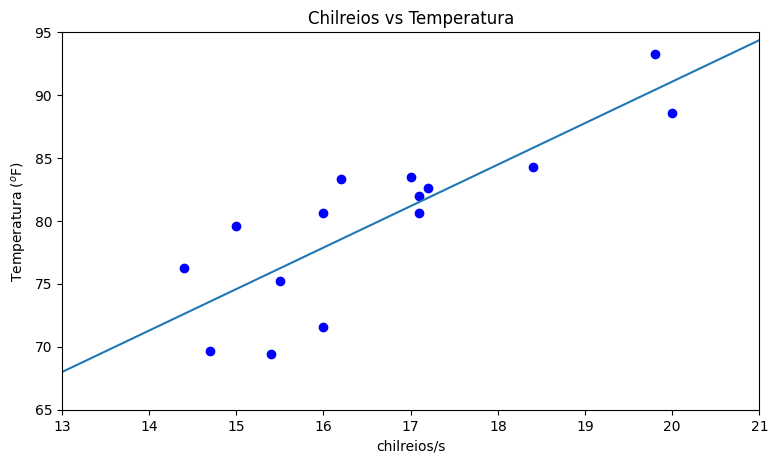

In [50]:
xx = np.linspace(0, 21, 1000)

plt.scatter(grilos[:, 0], 
            grilos[:, 1], 
            marker = 'o', 
            c = 'b')

plt.plot(xx,h(theta_new[0], 
              theta_new[1], 
              xx))

plt.xlim([13,21])
plt.ylim([65,95])
plt.title('Chilreios vs Temperatura')
plt.xlabel('chilreios/s')
plt.ylabel('Temperatura ($^{o}$F)');

#### Estude o caso do Gradiente Descendente em Lote ([Batch Gradient Descent](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)) e outras técnicas.

#### Exercício 3 - Gradiente Descendente Estocástico.

#### Como fizemos acima, no Gradiente Descendente em Lote (batch gradient descent), devemos olhar para cada exemplo em todo o conjunto de treinamento em cada etapa (nos casos em que um conjunto de treinamento é usado para o Gradiente Descendente). Isso pode ser bastante lento se o conjunto de treinamento for suficientemente grande. o Gradiente Descendente Estocástico ([Stochastic Gradient Descent](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)) atualizamos nossos valores depois de olhar para cada item no conjunto de treinamento, para que possamos começar a fazer progresso imediatamente. 

#### Teremos:

$$
\begin{equation}
\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)
\end{equation}
$$

$$
\begin{equation}
\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)
\end{equation}
$$

#### Em que: 

$$
\begin{equation}
h_\theta(x) = \theta_{0} + \theta_{1} x
\end{equation}
$$

#### Seguimos o algoritmo, com $\alpha$ constante:

- Encontre um valor inicial para $X_{0}$
- Escreva um laço para $i$, com um número ($i = 0, 1, 2, ... $) de variáveis.
- Calcule $s_k$ = -$\nabla f(x_k)$
- Escolha a taxa de aprendizado $\alpha_{k}$ que minimiza $f(x_k+\alpha_{k} s_{k})$
- Faça $x_{k + 1} = x_{k} + \alpha_k s_{k}$

#### Quando os dados de amostra tinham $15$ pontos de dados como no exemplo acima, o cálculo do gradiente não era muito caro. Mas, para conjuntos de dados muito grandes, esse não seria o caso. Então, em vez disso, consideramos um algoritmo de Gradiente Descendente Estocástico para regressão linear simples, em que $m$ é o tamanho do conjunto de dados:

- Embaralhe aleatoriamente o conjunto de dados.
- Escrevar um laço para :

$$
\begin{bmatrix}
 \theta_{1} \\ 
 \theta_2 \\ 
 \end{bmatrix} = 
 \begin{bmatrix}
 \theta_1 \\ 
 \theta_2 \\ 
 \end{bmatrix} - 
 \alpha\begin{bmatrix}
 2(h_\theta(x_i)-y_i) \\ 
 2x_i(h_\theta(x_i)-y_i) \\ 
 \end{bmatrix}
 $$

#### Normalmente, com a Gradiente Descendente Estocástico, você percorrerá todo o conjunto de dados de $1$ a $10$ vezes, dependendo da velocidade de convergência dos dados e do tamanho do conjunto de dados.

#### Com o Gradiente Descendente em lote, devemos percorrer todo o conjunto de dados antes de fazer qualquer progresso. Porém, com esse algoritmo, podemos progredir imediatamente e continuar avançando conforme analisamos o conjunto de dados. Portanto, a Gradiente Descendente Estocástico é freqüentemente preferido ao lidar com grandes conjuntos de dados.

#### Ao contrário da Gradiente Descendente, o Gradiente Descendente Estocástica tenderá a oscilar perto de um valor mínimo em vez de se aproximar continuamente. No entanto, pode nunca convergir para o mínimo. Uma maneira de contornar isso é diminuir lentamente o tamanho do passo $\alpha$, conforme o algoritmo é executado. No entanto, isso é menos comum do que usar um $\alpha$ fixo.

#### Aplique a seguir o Gradiente Descendente Estocástico para uma regressão linear, em que criamos um conjunto de $500.000$ pontos em torno da linha $y = 2x + 17 + \epsilon $, para valores de $x= [0, 100]$.

In [58]:
f= lambda x: x * 2 + 17 + np.random.randn(len(x)) * 10

x = np.random.random(500000) * 100
y = f(x) 
m = len(y)

#### Primeiro, embaralhe aleatoriamente o conjunto de dados. Observe que essa etapa não é estritamente necessária, pois os dados já estão em uma ordem aleatória. No entanto, isso obviamente nem sempre é o caso:

In [59]:
from random import shuffle

x_shuf = []
y_shuf = []

index_shuf = list(range(len(x)))
shuffle(index_shuf)

for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

#### Configure a função $h$ e a função de custo para verificar como o valor está melhorando.

In [60]:
h = lambda theta_0, theta_1, x: theta_0 + theta_1 * x
funcao_custo2 = lambda theta_0, theta_1, x_i, y_i: 0.5 * (h(theta_0, theta_1, x_i) - y_i) ** 2

#### Crie e execute o algoritmo de Gradiente Descendente Estocástico. Para observar seu progresso, faça uma medição de custo a cada etapa. A cada $10.000$ etapas, obtenha um custo médio das últimas $10.000$ etapas e, em seguida, anexe isso a uma variável `cost_list`. Percorra a lista inteira $10$ vezes.

In [62]:
theta_old = np.array([0., 0.])
theta_new = np.array([1., 1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
s_k = np.array([float("inf"), 
                float("inf")
               ]
              )
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(theta_old[0], theta_old[1], x[i]) - y[i])
        s_k[1] = (h(theta_old[0], theta_old[1], x[i]) - y[i]) * x[i]
        s_k = (-1) * s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += funcao_custo2(theta_old[0], 
                         theta_old[1], 
                         x[i], 
                         y[i]
                        )
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost / 10000.0)
            sum_cost = 0   
            
print("Mínimo local ocorre em:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

Mínimo local ocorre em:
theta_0 = 16.95598055455278
theta_1 = 1.975745399283837


#### Discuta os valores para $\theta_0$ e $ \theta_1$ encontrados. Plote o custo versus o número de iterações. o que você pode dizer sobre o custo ao longo das iterações?

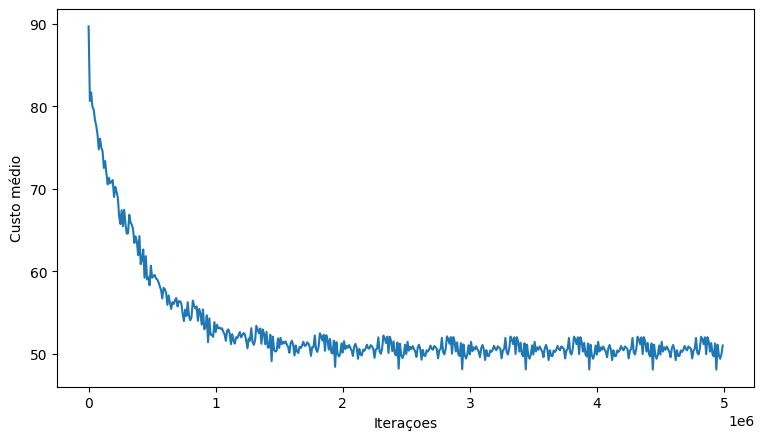

In [63]:
iterations = np.arange(len(cost_list)) * 10000
plt.plot(iterations,
         cost_list
        )
plt.xlabel("Iteraçoes")
plt.ylabel("Custo médio");

Nós temos uma queda bem grande do custo no início das iterações, porém, em um determinado momento (a partir de 1 no gráfico) podemos perceber que além do custo não diminuir de forma mais considerável, ele fica oscilando entre pontos mínimos locais. Podemos dizer que a partir de um determinado numero de iterações 1(1e6), o custo já não apresenta mudanças significativas e estamos fazendo iterações desnecessárias neste caso.